In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, random_split
from dataset import DCTDataset
from model import LIDCT, FCIDCT, FCCNNIDCT, DECNNIDCT
from tqdm import tqdm
from preprocess import load_file
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.fft import dct, idct
import cv2
# plt.style.use('dark_background')


In [2]:
#filename = "testset_50000_8"
model_type = "decnn"
modelname = f"{model_type}_dataset_300000_8_cv_dct"
outputimagename = f"{model_type}_dataset_300000_8_cv_dct"

size = 8

In [3]:
train_on_gpu = torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# dctDataset = DCTDataset(filename=filename)
# test_loader = DataLoader(dataset=dctDataset,
#                         batch_size=3,
#                         shuffle=True,
#                         num_workers=8,
#                         pin_memory=True)
if model_type == "fc":
    model = FCIDCT(size=size)
elif model_type == "cnn":
    model = LIDCT()
elif model_type == "fc_cnn":
    model = FCCNNIDCT(size=size)
elif model_type == "decnn":
    model = DECNNIDCT(num_channels=64, size=size)

model.to(device)
model.load_state_dict(torch.load(f"./model/{modelname}.pth"))
loss_fn = nn.MSELoss()
model.eval()
# test_set = load_file("data", filename)
print(model)
# print(len(dctDataset))

DECNNIDCT(
  (deconv1): ConvTranspose2d(64, 32, kernel_size=(8, 8), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)


In [4]:
img = np.float32(cv2.imread("test_image/0834.png", cv2.IMREAD_GRAYSCALE))/255
# recon = torch.from_numpy(np.zeros(img.shape)).to(device)
recon = np.zeros((img.shape[0]//size*size, img.shape[1]//size*size))

for i in range(0, img.shape[0] - size + 1, size):
    for j in range(0, img.shape[1] - size + 1, size):
        #x = torch.from_numpy(dct(img[i:i+size, j:j+size], norm="ortho").reshape((1, 1, size, size))).to(device)
        # x = torch.from_numpy(cv2.dct(img[i:i+size, j:j+size]).reshape((1, 1, size, size))).to(device)
        x = torch.from_numpy(cv2.dct(img[i:i+size, j:j+size]).reshape((1, 64, 1, 1))).to(device)
        output = model(x)
        recon[i:i+size, j:j+size] = output[0].cpu().detach().numpy()
        
print(recon[0])

[0.96831119 0.97512496 0.97017968 ... 0.80443615 0.81238699 0.8133918 ]


In [5]:
#test = recon.cpu().detach().numpy()
test = recon
print(test.shape)

(1352, 2040)


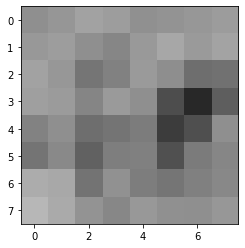

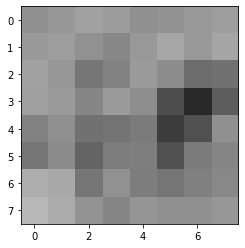

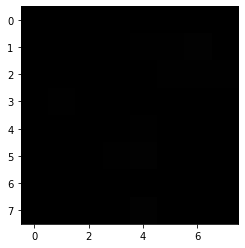

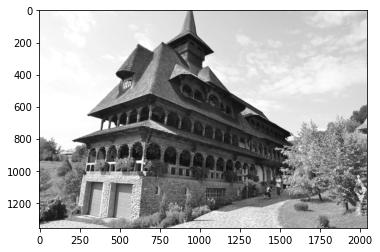

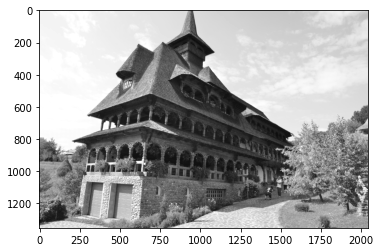

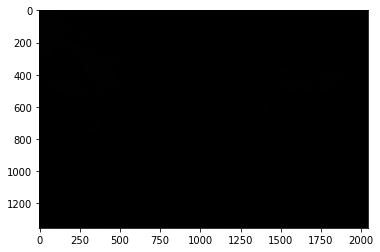

In [6]:
# print(test_set["y"][0].shape)
# norm="ortho"
# plt.imshow(test_set["y"][n][0]*255, cmap="gray", vmin=0, vmax=255)
# plt.show()
# plt.imshow(test_set["x"][n][0])
# plt.show()
# plt.imshow(idct(test_set["x"][n][0], norm="ortho")*255, cmap="gray", vmin=0, vmax=255)
# plt.show()
# plt.imshow(idct()*255, cmap="gray")
# plt.show()
# plt.imshow(output.cpu().detach().numpy()[0][0]*255, cmap="gray", vmin=0, vmax=255)
y_pos, x_pos = 288, 560
#fig = plt.figure()
#plt.plot()
#plt.imshow()

plt.imshow(img[y_pos:y_pos + size, x_pos:x_pos + size]*255, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(test[y_pos:y_pos + size, x_pos:x_pos + size]*255, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(img[y_pos:y_pos + size, x_pos:x_pos + size]*255-test[y_pos:y_pos + size, x_pos:x_pos + size]*255, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(img*255, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(test*255, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(img[:1352, :]*255-test[:1352, :]*255, cmap="gray", vmin=0, vmax=255)
plt.show()

# val_one_epoch(1)

In [7]:
cv2.imwrite(f"./output/{outputimagename}.png", test*255)

True

In [8]:
cv2.imwrite(f"test_diff.png", img[:1352, :]*255-test[:1352, :]*255)

True

In [23]:
cv2.imwrite("gray.png", img[:1352, :]*255)

True

In [25]:
 img[:1352, :].shape

(1352, 2040)